# OCR Prototypes

Rerun the first code cell to reload the files if new files are added

In [ ]:
# Install the ipynb package
#%pip install ipynb

# Base code for all notebooks in the same folder
from ipynb.fs.full.common import setup, reload_packages # type: ignore

files = []
files = setup()

print(f"Number of files: {len(files)}")

/Users/tedbouskill/Repos/MyGitHub/wordscape-score-scraper/.venv/bin/python
3.11.11 | packaged by conda-forge | (main, Dec  5 2024, 14:24:23) [Clang 18.1.8 ]
Common Files Setup()
Looking for files in /Users/tedbouskill/Repos/MyGitHub/wordscape-score-scraper/prototypes/../png_samples
Number of files found: 8
Common Files Setup()
Looking for files in /Users/tedbouskill/Repos/MyGitHub/wordscape-score-scraper/prototypes/../png_samples
Number of files: 8
1.26.4
4.10.0


## Reload Packages()

Rerun the cell below this one to reload common packages in repo_packages or workspace_packages if they change

In [189]:
reload_packages()

import cv2 # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pytesseract # type: ignore
import io

from cls_img_tools import ImageTools
from cls_string_helpers import StringHelpers

from PIL import Image, ImageOps, ImageFilter # type: ignore

import os

def no_op():
    pass

def resize_image_pillow(image_path: str, new_width: int=1200):
    with Image.open(image_path) as img:
        original_width, original_height = img.size
        aspect_ratio = original_height / original_width
        new_height = int(aspect_ratio * new_width)

        resized_img = img.resize((new_width, new_height), Image.LANCZOS)
        return resized_img, new_height

def resize_image_opencv(image_path: str, new_width: int = 1200) -> np.ndarray:
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Get the original dimensions
    original_height, original_width = img.shape[:2]

    # Calculate the new dimensions
    aspect_ratio = original_height / original_width
    new_height = int(aspect_ratio * new_width)

    # Resize the image
    resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LANCZOS4)

    return resized_img, new_height

def crop_image_opencv(image: np.ndarray, x: int, y: int, width: int, height: int) -> np.ndarray:
    # Crop the image using array slicing
    cropped_img = image[y:y+height, x:x+width]
    return cropped_img

def enhance_image(img, scale=2) -> Image.Image:
    img = img.convert('L')  # Convert the image to grayscale

    # Apply binary thresholding
    img = img.point(lambda x: 0 if x < 225 else 255, '1')

    # Resize the image
    img = img.resize((img.width * scale, img.height * scale), Image.LANCZOS)

    # Sharpen the image
    img = img.filter(ImageFilter.SHARPEN)

    return img

def enhance_image_opencv(img, scale=2) -> np.ndarray:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Step 1: Enhance contrast with CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(gray)

    # Step 2: Apply gamma correction
    def adjust_gamma(image, gamma=1.5):
        inv_gamma = 1.0 / gamma
        table = np.array([((i / 255.0) ** inv_gamma) * 255
                        for i in np.arange(0, 256)]).astype("uint8")
        return cv2.LUT(image, table)

    brightened = adjust_gamma(contrast_enhanced, gamma=1.5)

    _, binary = cv2.threshold(brightened, 200, 255, cv2.THRESH_BINARY)

    return binary

def convert_to_black_and_white(image: np.ndarray, threshold: int = 128) -> np.ndarray:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)

    return binary

def convert_non_white_to_black_opencv(image: np.ndarray, threshold=225) -> np.ndarray:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create a mask where pixels above the threshold are considered white
    mask = gray > threshold

    # Create an output image and set all pixels to black
    output = np.zeros_like(image)

    # Set the pixels that are above the threshold in the original image to white in the output image
    output[mask] = [255, 255, 255]

    return output

def is_white(pixel, threshold=225):
    r, g, b = pixel
    return r > threshold and g > threshold and b > threshold

def convert_non_white_to_black(image, threshold=225):
    # Ensure the image is in RGB mode
    img = image.convert('RGB')

    # Create a new image with the same size
    new_img = Image.new('RGB', img.size)

    # Process each pixel
    for x in range(img.width):
        for y in range(img.height):
            pixel = img.getpixel((x, y))
            if is_white(pixel):
                new_img.putpixel((x, y), (255, 255, 255))  # Keep white pixels as white
            else:
                new_img.putpixel((x, y), (0, 0, 0))  # Convert non-white pixels to black

    return new_img

def display_image(img, title="Image", rotate=0):
    # Rotate the image 90 degrees clockwise for display
    img = img.rotate(rotate, expand=True)

    # Display the image using matplotlib
    plt.imshow(img)
    plt.title(title)

    plt.axis('off')  # Hide the axis
    plt.show()

def display_image_opencv(img, title="Image"):
    # Display the image using matplotlib
    plt.imshow(img)
    plt.title(title)

    plt.axis('off')  # Hide the axis
    plt.show()


Reloading packages


## Prototypes

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


State: 1d 4h
Length of player results:  8
Length of score results:  4
Text: dinogirl, Numeric: 168
Text: Iichi, Numeric: 137
Text: RNnCinci, Numeric: 45
Text: keymony, Numeric: 11
Unmatched:
Text: butterfly, Confidence: 0.9999574418308277
Text: Not Participating, Confidence: 0.9936125921565465
Text: 1, Confidence: 0.13541180521381424
Text: allenge yourseltl, Confidence: 0.6048675289949942


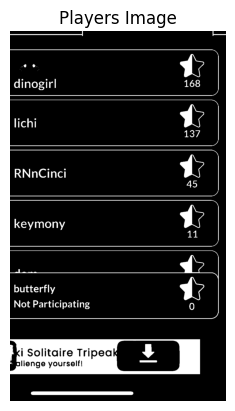


State: FINISHED
Rank: #2
Length of player results:  6
Length of score results:  6
Text: spudly, Numeric: 1130
Text: kay, Numeric: 1094
Text: cariann, Numeric: 1062
Text: mike, Numeric: 1036
Text: tedbilly, Numeric: 1005
Text: Goose, Numeric: 991
Unmatched:


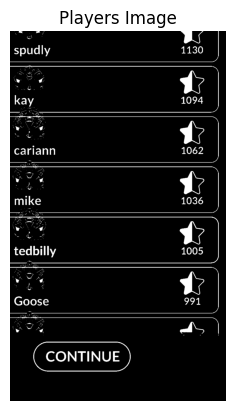


State: 1d 4h
Length of player results:  7
Length of score results:  7
Text: zmewis, Numeric: 3546
Text: tedbilly, Numeric: 1896
Text: Siley, Numeric: 1380
Text: Dewey, Numeric: 1333
Text: Jay, Numeric: 1207
Text: JoCo, Numeric: 1130
Text: Stranger, Numeric: 1065
Unmatched:


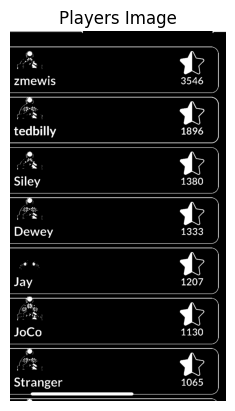


State: FINISHED
Rank: #2
Length of player results:  6
Length of score results:  6
Text: Suriel, Numeric: 5067
Text: Mar, Numeric: 2984
Text: chibong, Numeric: 2654
Text: Murphy, Numeric: 2558
Text: zmewis, Numeric: 2543
Text: tedbilly, Numeric: 1005
Unmatched:


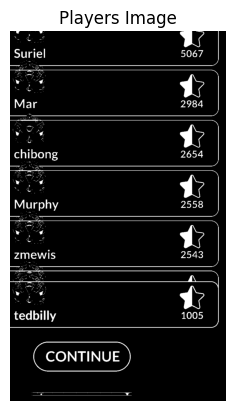

In [203]:
import dis
from re import S
from tokenize import String
import easyocr # type: ignore

# Initialize EasyOCR
reader = easyocr.Reader(['en'])

for img_file in files:
    if "reduced" in img_file:
        continue

    img, new_height = resize_image_opencv(img_file)

    #img = enhance_image_opencv(img)

    #header_img = img.crop((0, 0, 1200, 1050))
    #display_image(header_img, title="Header Image")

    state_img = crop_image_opencv(img, 450, 680, 300, 100)

    state_txt = pytesseract.image_to_string(state_img).strip()
    print(f"State: {state_txt}")
    #display_image_opencv(state_img, title="State Image")

    # If tournament fininshed, the rank image is present
    if state_txt == "FINISHED":
        rank_img = crop_image_opencv(img, 100, 540, 200, 110)
        rank_img = convert_non_white_to_black_opencv(rank_img)
        rank_txt = pytesseract.image_to_string(rank_img).strip()
        print(f"Rank: {rank_txt}")
        #display_image_opencv(rank_img, title="Rank Image")

    #ranks_img = crop_image_opencv(img, 40, 1000, 110, new_height - 1000)
    #ranks_img = enhance_image_opencv(ranks_img)
    #results = reader.readtext(ranks_img)
    #for box, text, confidence in results:
    #    print(f"Box: {box}, Text: {text}, Confidence: {confidence}")
    #display_image_opencv(ranks_img, title="Ranks Image")

    player_results = []
    score_results = []

    players_img = crop_image_opencv(img, 300, 1050, 900, new_height - 1050)
    players_img = convert_non_white_to_black_opencv(players_img, 200)
    results = reader.readtext(players_img)
    for box, text, confidence in results:
        #print(f"Box: {box}, Text: {text}, Confidence: {confidence}")
        # If the y is less than 100, then it is the player name
        if box[0][0] < 50:
            player_results.append((box, text, confidence))

        if box[0][0] > 500 and StringHelpers.is_all_numeric(text):
            score_results.append((box, text, confidence))

    print("Length of player results: ", len(player_results))
    print("Length of score results: ", len(score_results))

     # Match numeric values with text values based on y-coordinate
    matches = []
    unmatched = []
    for text_box, text, text_confidence in player_results:
        text_y = text_box[0][1]  # y-coordinate of the top-left corner of the text box
        matched = False
        for num_box, num_text, num_confidence in score_results:
            num_y = num_box[0][1]  # y-coordinate of the top-left corner of the numeric box
            if 0 < abs(num_y - text_y) < 100:
                matches.append((text, num_text))
                matched = True
                break
        if not matched:
            unmatched.append((text, text_confidence))

    # Print matched results
    for text, num in matches:
        print(f"Text: {text}, Numeric: {num}")

    # Print unmatched results
    print("Unmatched:")
    for text, confidence in unmatched:
        print(f"Text: {text}, Confidence: {confidence}")

    display_image_opencv(players_img, title="Players Image")

    #with img.crop((40, 1000, 150, new_height)) as ranks_img:
    #    tmp_ranks_imag_path = "temp_ranks_image.png"
    #    ranks_img.save(tmp_ranks_imag_path)
    #    results = reader.readtext(tmp_ranks_imag_path)
    #    for box, text, confidence in results:
    #        print(f"Box: {box}, Text: {text}, Confidence: {confidence}")
    #    #display_image(ranks_img, title="Ranks Image")
    #    os.remove(tmp_ranks_imag_path)

    #with img.crop((300, 1050, 1200, new_height)) as players_img:
    #    players_img = convert_non_white_to_black(players_img)
    #    tmp_players_imag_path = "temp_players_image.png"
    #    players_img.save(tmp_players_imag_path)
    #    players_results = reader.readtext(tmp_players_imag_path)
    #    for box, text, confidence in players_results:
    #        print(f"Box: {box}, Text: {text}, Confidence: {confidence}")
    #    #print(f"Players: {players_text}")
    #    display_image(players_img, title="Players Image")

    #scores_img = img.crop((980, 1050, 1150, new_height))
    #display_image(scores_img, title="Scores Image")

    print()


In [23]:
import easyocr
import re

import cls_string_helpers as StringHelpers

from fuzzywuzzy import fuzz, process
from hmac import new

def get_min_max_values(boxes):
    if not boxes:
        return None, None, None, None

    min_height = min(min(box[0][1], box[1][1], box[2][1], box[3][1]) for box in boxes)
    min_width = min(min(box[0][0], box[1][0], box[2][0], box[3][0]) for box in boxes)
    max_height = max(max(box[0][1], box[1][1], box[2][1], box[3][1]) for box in boxes)
    max_width = max(max(box[0][0], box[1][0], box[2][0], box[3][0]) for box in boxes)

    return min_height, min_width, max_height, max_width

# Initialize EasyOCR
reader = easyocr.Reader(['en'])

tt_ds = set()
ts_dims = set()
team_rank_dims = set()
teammates_dims = set()
first_dims = set()
second_dims = set()
third_dims = set()
scores_dims = set()

max_image_heights = []
unique_strings = set()
unique_uppercase_strings = set()

for img_file in files:
    temp_path, new_height = resize_image(img_file)
    max_image_heights.append(new_height)

    results = reader.readtext(temp_path)

    for box, text, confidence in results:
        box_tuple = tuple(map(tuple, box))  # Convert list of lists to tuple of tuples

        if StringHelpers.is_all_uppercase(text):
            if text == "TEAM TOURNAMENT":
                tt_ds.add(box_tuple)
                continue
            if text == "FINISHED":
                ts_dims.add(box_tuple)
                continue
            if text == "TEAMMATES":
                teammates_dims.add(box_tuple)
                continue

            similarity_ratio = fuzz.ratio(text, "TEAM TOURNAMENT")
            if similarity_ratio > 75:
                tt_ds.add(box_tuple)
                continue

            unique_uppercase_strings.add(text)

            continue

        if StringHelpers.is_all_numeric(text):
            nbr = StringHelpers.convert_to_integer(text)

            if nbr > 50 and box[0][0] > 600:
                scores_dims.add(box_tuple)
                continue

            if text == "1":
                first_dims.add(box_tuple)
                continue
            if text == "2":
                second_dims.add(box_tuple)
                continue
            if text == "3":
                third_dims.add(box_tuple)
                continue

            continue

        if text.startswith("#"):
            team_rank_dims.add(box_tuple)
            continue

        unique_strings.add(text)

        #print(f"\tBox: {box_tuple}, Text: {text}, Confidence: {confidence}")

    os.remove(temp_path)

max_image_height = max(max_image_heights)
print(f"MAX IMAGE HEIGHT {max_image_height}")

# Collect min/max values for each set of boxes
data = [
    ("TEAM TOURNAMENT", *get_min_max_values(tt_ds)),
    ("FINISHED", *get_min_max_values(ts_dims)),
    ("TEAMMATES", *get_min_max_values(teammates_dims)),
    ("FIRST", *get_min_max_values(first_dims)),
    ("SECOND", *get_min_max_values(second_dims)),
    ("THIRD", *get_min_max_values(third_dims)),
    ("SCORES", *get_min_max_values(scores_dims)),
    ("TEAM RANK", *get_min_max_values(team_rank_dims))
]

print(unique_uppercase_strings)
print(unique_strings)

# Print CSV formatted output
print("Label,min_height,min_width,max_height,max_width")
for row in data:
    print(",".join(map(str, row)))

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


MAX IMAGE HEIGHT 2596
{'CONTINUE', 'RANKING', 'REWARD', 'RANK'}
{'prizes will be divided by 50.', 'lichi', 'Dewey', 'TEAM -OURNAENT', '25,000', 'mike', '~EAV TOURNAMEN-', 'zmewis', 'dinogirl', "Win prizes based on your team's stars! The team", 'keymony', '1d 4h', 'allenge yourselfl', 'chibong', 'xi Solitaire Trigeak', 'kay', 'JoCo', '1d4h', 'Not Participating', 'Stranger', 'butterfly', 'allongo vcursomi', 'Goose', 'spudly', 'ki Solitaire Tripeak', 'Mar', 'Siley', 'Murphy', 'tedbilly', 'cariann', 'Suriel', 'RNnCinci', "Win prizes based on your team'$ stars! The team", 'Jay'}
Label,min_height,min_width,max_height,max_width
TEAM TOURNAMENT,177,178,280,1025
FINISHED,690,481,750,722
TEAMMATES,843,668,1041,1080
FIRST,1081,81,1243,105
SECOND,1288,77,1456,109
THIRD,1500,77,1665,109
SCORES,629,925,2540,1114
TEAM RANK,542,144,633,270
